Importing packages:


system_initialiser_package generates the system


pulse_initialiser_package generates the pulse


solver_package solves the density matrix

In [10]:
from system_initialiser_package import *
from pulse_initialser_package import *
from solver_package import *
%matplotlib inline

Importing the pulse  and system file

In [35]:
my_pulse = npulse.get('Kiiro_Input_File.txt')
my_system = system.get_extended('Kiiro_Input_File.txt')

nbar 2.387483487612038
Starting Populations: [6.93239013e-01 3.06760980e-01 8.84937877e-53 3.91588478e-53]
Mu: [[0.0, 0.0, 4.2e-29, 4.2e-29], [0.0, 0.0, 4.2e-29, 4.2e-29], [4.2e-29, 4.2e-29, 0.0, 0.0], [4.2e-29, 4.2e-29, 0.0, 0.0]]


Calculating the spectral and temporal components of pulse

Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.


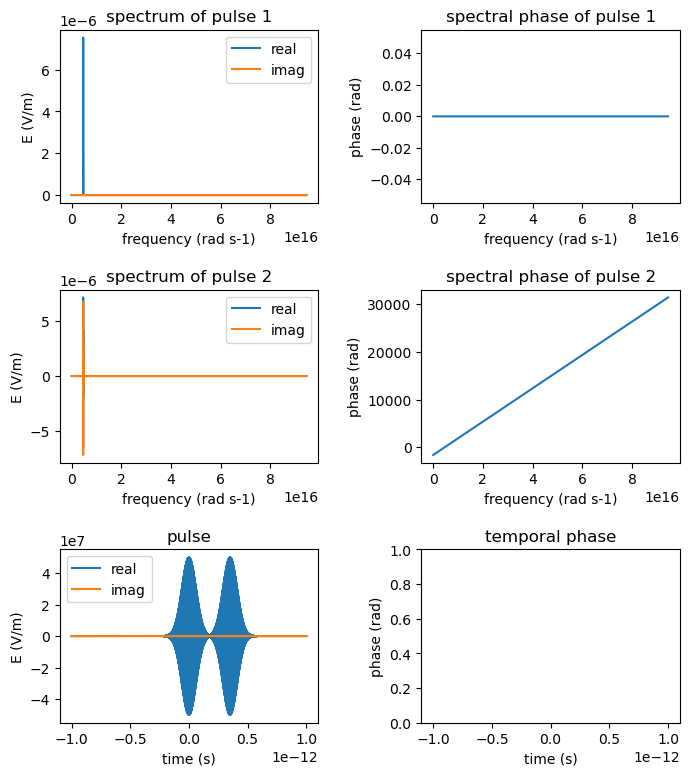

In [36]:
my_pulse.spectral()
my_pulse.temporal()

my_pulse.plot()

Solving the DM equations

In [37]:
rho_pump = solve(my_pulse,my_system)
print('Time dependant density matrix of shape ' +str(np.shape(rho_pump)))
time = my_pulse.time[::2]
print('Time in seconds of shape ' +str(np.shape(time)))
E_field_laser =np.real(my_pulse.E_time[::2])
print('Laser E-Field')

Solver finished.
Time dependant density matrix of shape (4, 4, 30082)
Time in seconds of shape (30082,)
Laser E-Field


Saving density matrix and time 

In [38]:
np.savetxt('rho_pump.txt',np.reshape(rho_pump,(16,np.size(time))),delimiter = ';')
np.savetxt('time.txt',time,delimiter = ';')

Welcome to now plot what you want, all info is contained in 'rho_pump'

Populations are diagonal elements e.g. rho_pump[0,0,100] gives population in state 0 at time point 101 

Coherence are off-diagonal elements e.g. rho_pump[0,1,100] gives coherence (vibrational) between state 0 and 1 at timepoint 101 

I have plotted some useful things below:

Populations of all states

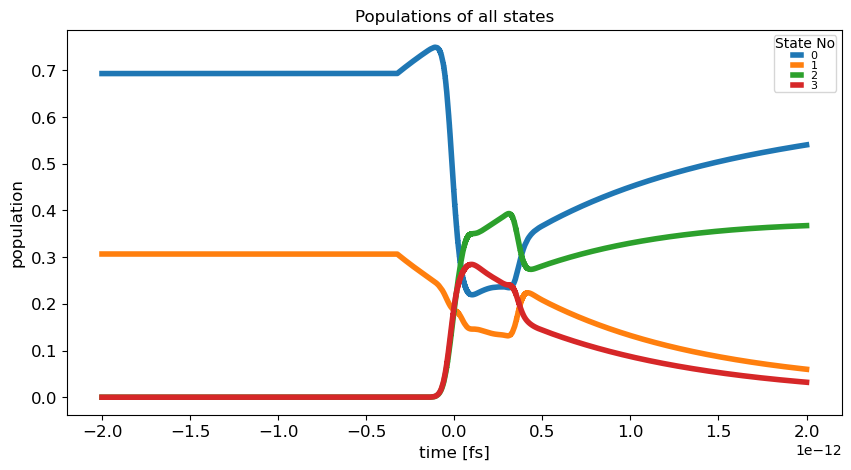

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(0,4):
    y = abs(rho_pump[i,i])
    
    m = i
    ax.plot(time_new, y, label = m, linewidth=4)
    
ax.set_xlabel('time [fs]', fontsize=12)
ax.set_ylabel('population',fontsize=12)
plt.title("Populations of all states")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
legend = ax.legend(loc='best', shadow=False,fontsize=8,borderpad = 0.1, labelspacing = 0, handlelength = 0.8, title = 'State No')
plt.show()

Populations in each electronic state

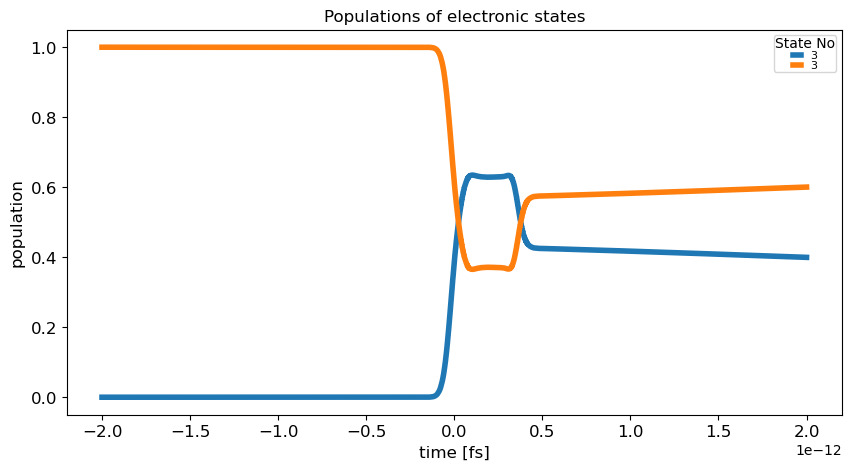

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(time_new, abs(rho_pump[2,2])+abs(rho_pump[3,3]), label = m, linewidth=4)
ax.plot(time_new, abs(rho_pump[0,0])+abs(rho_pump[1,1]), label = m, linewidth=4)
    
ax.set_xlabel('time [fs]', fontsize=12)
ax.set_ylabel('population',fontsize=12)
plt.title("Populations of electronic states")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_xlim(-2e-12,0)
legend = ax.legend(loc='best', shadow=False,fontsize=8,borderpad = 0.1, labelspacing = 0, handlelength = 0.8, title = 'State No')
plt.show()

Vibrational Coherence

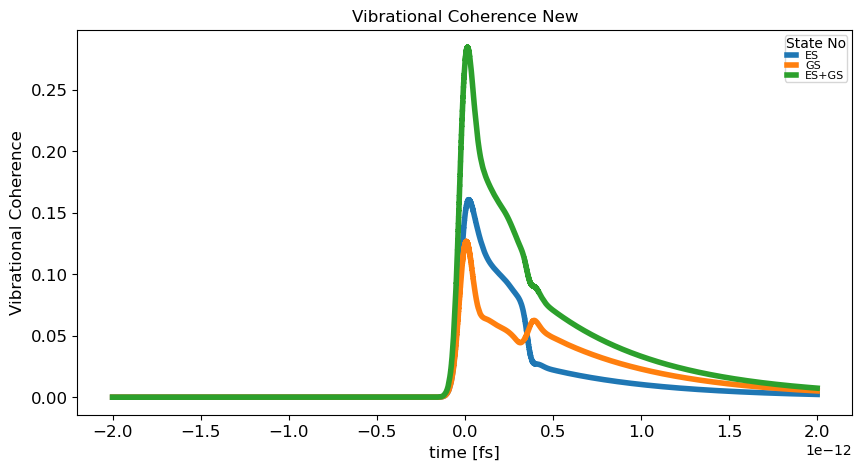

In [22]:

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(time_new, abs(rho_pump[2,3]), label = 'ES', linewidth=4)
ax.plot(time_new, abs(rho_pump[0,1]), label = 'GS', linewidth=4)
ax.plot(time_new, abs(rho_pump[2,3])+abs(rho_pump[0,1]), label = 'ES+GS', linewidth=4)
 
ax.set_xlabel('time [fs]', fontsize=12)
ax.set_ylabel('Vibrational Coherence',fontsize=12)
plt.title("Vibrational Coherence")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_xlim(-2e-12,0)
legend = ax.legend(loc='best', shadow=False,fontsize=8,borderpad = 0.1, labelspacing = 0, handlelength = 0.8, title = 'State No')
plt.show()

Real and Imaginary componet of coherence: analogous to p and q

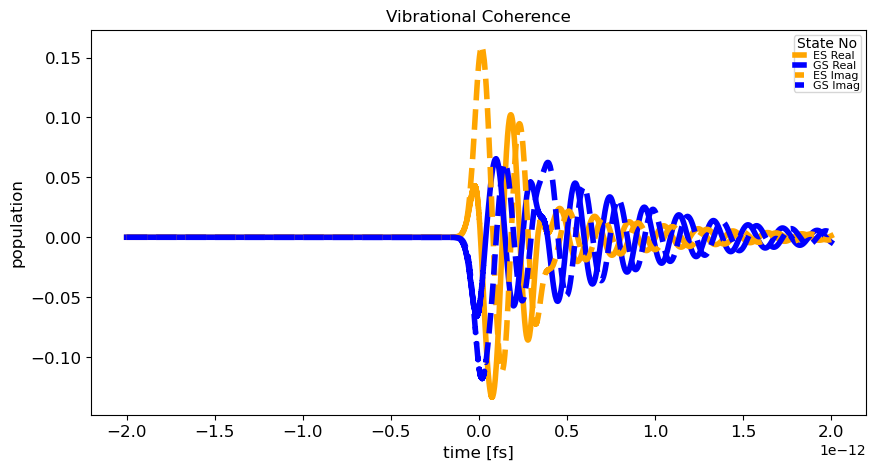

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(time_new, np.real(rho_pump[2,3]), label = 'ES Real', linewidth=4, color = 'orange')
ax.plot(time_new, np.real(rho_pump[0,1]), label = 'GS Real', linewidth=4, color = 'blue')
ax.plot(time_new, np.imag(rho_pump[2,3]), label = 'ES Imag', linewidth=4, color = 'orange', linestyle = 'dashed')
ax.plot(time_new, np.imag(rho_pump[0,1]), label = 'GS Imag', linewidth=4, color = 'blue',linestyle = 'dashed')


ax.set_xlabel('time [fs]', fontsize=12)
ax.set_ylabel('population',fontsize=12)
plt.title("Vibrational Coherence")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

legend = ax.legend(loc='best', shadow=False,fontsize=8,borderpad = 0.1, labelspacing = 0, handlelength = 0.8, title = 'State No')
plt.show()

Useful function to find time indexs 

In [26]:
def find_time_index(timestamps, time_list):
    t_length = len(time_list)
    t_range = int(round((time_new[-1]-time_new[0])*1E15,0))
    t_interval= int(round((t_length/t_range),0))
    t_half = int(round(t_length/2 ,0))
    t_index = []
    for i in timestamps:
        print(i)
        
        t_index.append(t_half + (i*t_interval))

    return t_index

Example of looping thorough to change pulse parameter:

Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters f

Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.


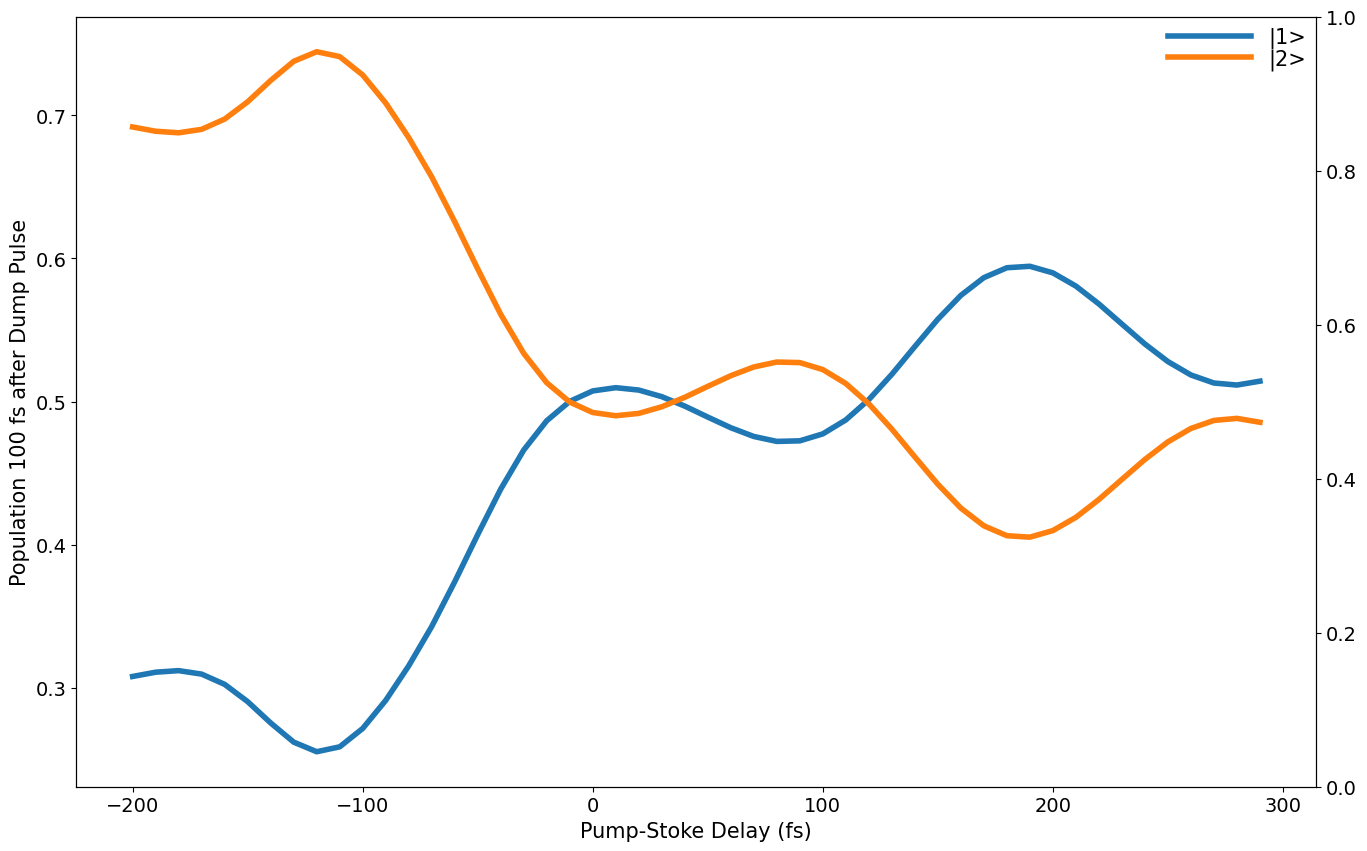

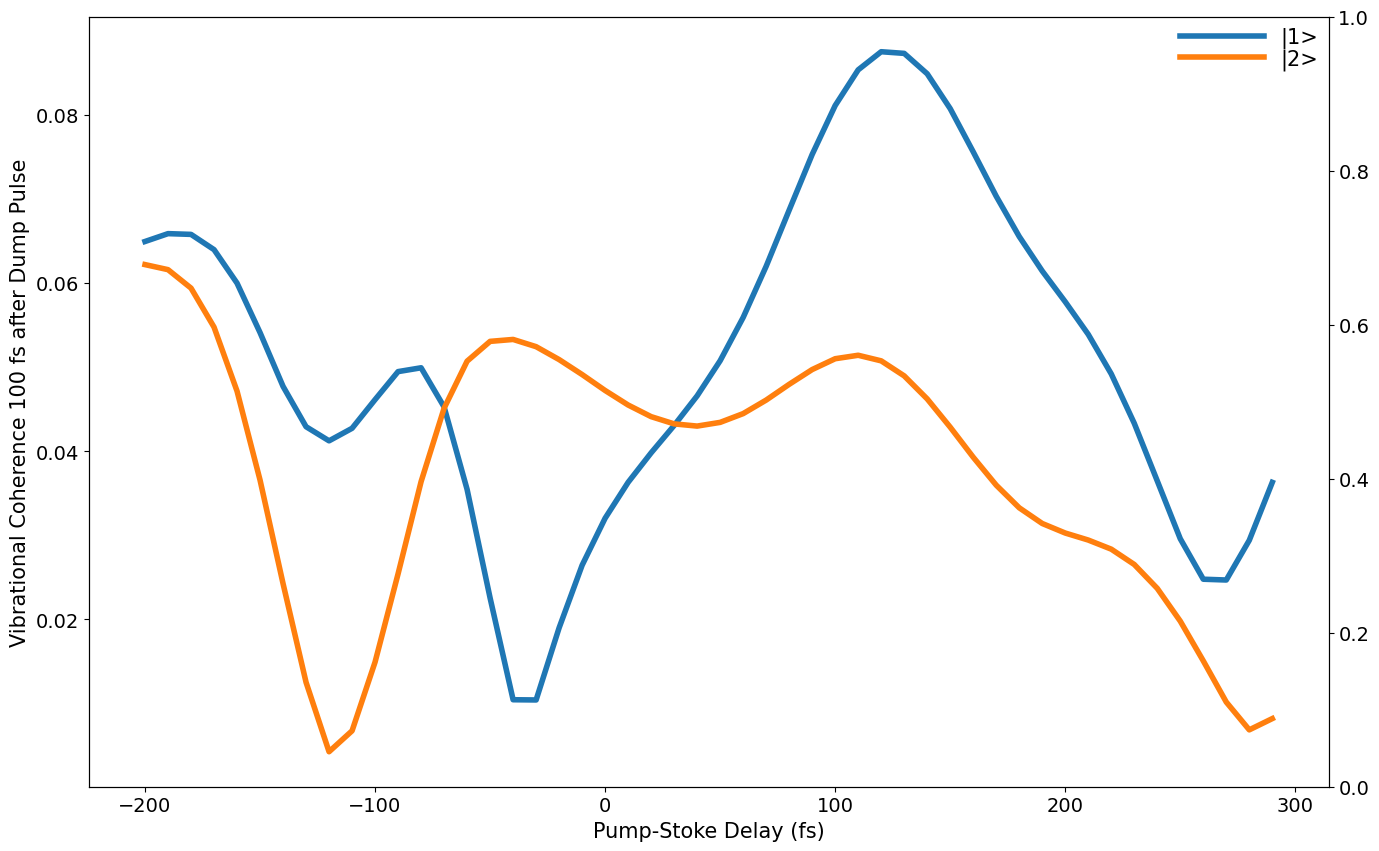

In [31]:
%matplotlib inline
######Population and Coherence 100 fs after pulse- Changing Pump-Stoke Delay#####
delay_start = -200e-15
delay_end = 300e-15
num_interval = 50

delay_gap = (delay_end-delay_start)/num_interval

delay_list = []
vib_pop_array_1=[]
vib_pop_array_2=[]


vib_coh_array_1=[]
vib_coh_array_2=[]


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

for delay_index in range(0,num_interval):
    delay = delay_start + (delay_index*delay_gap)
    my_pulse.phase_param = [[0, 0, 0.0, 0.0],[0.0,delay, 0.0, 0.0]]
    my_pulse.spectral()
    my_pulse.temporal()
    
    rho = solve(my_pulse,my_system)
    value = delay + 100e-15

    time_new = my_pulse.time[::2]
    val_1 = find_nearest(time_new, value)
    index = np.where(time_new== val_1)
    
    vib_pop_1 = abs(rho[0,0,index])+abs(rho[1,1,index])
    vib_pop_2 = abs(rho[2,2,index])+abs(rho[3,3,index])
    vib_coh_1 = abs(rho[0,1,index])
    vib_coh_2 = abs(rho[2,3,index])

    
    vib_pop_array_1.append(vib_pop_1)
    vib_pop_array_2.append(vib_pop_2)  
    vib_coh_array_1.append(vib_coh_1)
    vib_coh_array_2.append(vib_coh_2)  

    delay_list.append(delay)
    
###########    
vib_coh_array_1 = np.array(vib_coh_array_1)   
vib_coh_array_1= vib_coh_array_1.reshape(-1)
vib_coh_array_2 = np.array(vib_coh_array_2)   
vib_coh_array_2= vib_coh_array_2.reshape(-1)

    
vib_pop_array_1 = np.array(vib_pop_array_1)   
vib_pop_array_1= vib_pop_array_1.reshape(-1)
vib_pop_array_2 = np.array(vib_pop_array_2)   
vib_pop_array_2= vib_pop_array_2.reshape(-1)

######Pop Plot#####

delay_list = [x*1E15 for x in delay_list]

fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax1.plot(delay_list,vib_pop_array_1 , linewidth=4,label = '|1>' )
ax1.plot(delay_list,vib_pop_array_2 , linewidth=4,label = '|2>')

ax1.set_xlabel('Pump-Stoke Delay (fs)', fontsize=15)
ax1.set_ylabel('Population 100 fs after Dump Pulse',fontsize=15)

ax1.tick_params(axis='x', labelsize=14)  
ax2.tick_params(axis='y', labelsize=14)  
ax1.tick_params(axis='y', labelsize=14) 
tx = ax2.yaxis.get_offset_text()
tx.set_fontsize(14)
legend = ax1.legend(loc='best', shadow=False,fontsize=15,borderpad = 0, labelspacing = 0, handlelength = 4,frameon=False)

plt.show()    

####Coh Plot###

fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax1.plot(delay_list*1,vib_coh_array_1 , linewidth=4,label = '|1>' )
ax1.plot(delay_list,vib_coh_array_2 , linewidth=4,label = '|2>')


ax1.set_xlabel('Pump-Stoke Delay (fs)', fontsize=15)
ax1.set_ylabel('Vibrational Coherence 100 fs after Dump Pulse',fontsize=15)

ax1.tick_params(axis='x', labelsize=14)  
ax2.tick_params(axis='y', labelsize=14)  
ax1.tick_params(axis='y', labelsize=14) 
tx = ax2.yaxis.get_offset_text()
tx.set_fontsize(14)
legend = ax1.legend(loc='best', shadow=False,fontsize=15,borderpad = 0, labelspacing = 0, handlelength = 4,frameon=False)

plt.show()    

Example changing pump wavelength

Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters f

Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spec

Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spec

Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temp

Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temp

Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temp

Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temp

Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spec

Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spec

Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spec

Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temporal parameters finished.
Solver finished.
Calculation of spectral parameters finished.
Calculation of spectral parameters finished.
Pulse Type: taylor
Calculation of temp

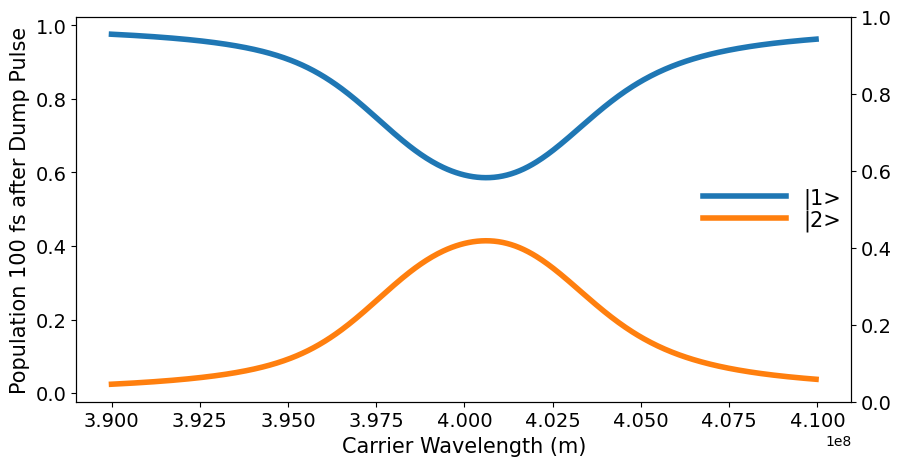

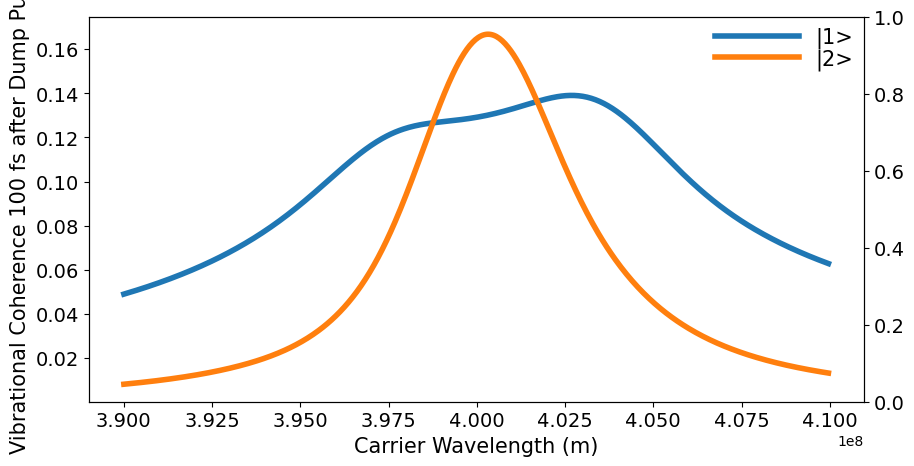

In [33]:
%matplotlib inline
######Population and Coherence at centre of pulse changing pump wavelength#####
delay_start = 390e-9
delay_end = 410e-9
num_interval = 50

delay_gap = (delay_end-delay_start)/num_interval

delay_list = []
vib_pop_array_1=[]
vib_pop_array_2=[]


vib_coh_array_1=[]
vib_coh_array_2=[]


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

for delay_index in range(0,num_interval):
    delay = delay_start + (delay_index*delay_gap)
    my_pulse.phase_param = [[0,0, 0e-15, 0.0],[0.0,0.0, 0.0, 0.0]]
    my_pulse.f_0 = [2*pi*3E8/delay,0]
    my_pulse.spectral()
    my_pulse.temporal()
    
    rho = solve(my_pulse,my_system)
    value = 0

    time_new = my_pulse.time[::2]
    val_1 = find_nearest(time_new, value)
    index = np.where(time_new== val_1)
    
    vib_pop_1 = abs(rho[0,0,index])+abs(rho[1,1,index])
    vib_pop_2 = abs(rho[2,2,index])+abs(rho[3,3,index])
    vib_coh_1 = abs(rho[0,1,index])
    vib_coh_2 = abs(rho[2,3,index])

    
    vib_pop_array_1.append(vib_pop_1)
    vib_pop_array_2.append(vib_pop_2)  
    vib_coh_array_1.append(vib_coh_1)
    vib_coh_array_2.append(vib_coh_2)  

    delay_list.append(delay)
    
###########    
vib_coh_array_1 = np.array(vib_coh_array_1)   
vib_coh_array_1= vib_coh_array_1.reshape(-1)
vib_coh_array_2 = np.array(vib_coh_array_2)   
vib_coh_array_2= vib_coh_array_2.reshape(-1)

    
vib_pop_array_1 = np.array(vib_pop_array_1)   
vib_pop_array_1= vib_pop_array_1.reshape(-1)
vib_pop_array_2 = np.array(vib_pop_array_2)   
vib_pop_array_2= vib_pop_array_2.reshape(-1)

######Pop Plot#####

delay_list = [x*1E15 for x in delay_list]

fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax1.plot(delay_list,vib_pop_array_1 , linewidth=4,label = '|1>' )
ax1.plot(delay_list,vib_pop_array_2 , linewidth=4,label = '|2>')

ax1.set_xlabel('Carrier Wavelength (m)', fontsize=15)
ax1.set_ylabel('Population at centre of pulse',fontsize=15)

ax1.tick_params(axis='x', labelsize=14)  
ax2.tick_params(axis='y', labelsize=14)  
ax1.tick_params(axis='y', labelsize=14) 
tx = ax2.yaxis.get_offset_text()
tx.set_fontsize(14)
legend = ax1.legend(loc='best', shadow=False,fontsize=15,borderpad = 0, labelspacing = 0, handlelength = 4,frameon=False)

plt.show()    

####Coh Plot###

fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax1.plot(delay_list*1,vib_coh_array_1 , linewidth=4,label = '|1>' )
ax1.plot(delay_list,vib_coh_array_2 , linewidth=4,label = '|2>')


ax1.set_xlabel('Carrier Wavelength (m)', fontsize=15)
ax1.set_ylabel('Vibrational Coherence at centre of pulse',fontsize=15)

ax1.tick_params(axis='x', labelsize=14)  
ax2.tick_params(axis='y', labelsize=14)  
ax1.tick_params(axis='y', labelsize=14) 
tx = ax2.yaxis.get_offset_text()
tx.set_fontsize(14)
legend = ax1.legend(loc='best', shadow=False,fontsize=15,borderpad = 0, labelspacing = 0, handlelength = 4,frameon=False)

plt.show()    

In [ ]:
######Population and Coherence at middle of stokes- Changing Pump-Stoke Delay#####
delay_start = 2E7
delay_end = 20E7
num_interval = 20


delay_gap = (delay_end-delay_start)/num_interval


#vib_coh_array = np.zeros((1,num_interval))

delay_list = []
vib_pop_array_1=[]
vib_pop_array_2=[]
#vib_pop_array_3=[]

vib_coh_array_1=[]
vib_coh_array_2=[]
#vib_coh_array_3=[]

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
%matplotlib inline
for delay_index in range(0,num_interval):
    delay = delay_start + (delay_index*delay_gap)
    print(delay)
    my_pulse.phase_param = [[1.23,166e-15, 0.0, 0.0,-100e-15],[0.0,0.0, 0.0, 0.0]]
    my_pulse.E_0 = [delay,0]
    my_pulse.spectral()
    my_pulse.temporal()
    my_pulse.plot()
    
    rho = solve(my_pulse,my_system)
    value = 500e-15
    print(delay)
    time_new = my_pulse.time[::2]
    val_1 = find_nearest(time_new, value)
    index = np.where(time_new== val_1)
    print(index)
    vib_pop_1 = abs(rho[0,0,index])+abs(rho[1,1,index])
    vib_pop_2 = abs(rho[2,2,index])+abs(rho[3,3,index])
   # vib_pop_3 = abs(rho[4,4,index])+abs(rho[5,5,index])

    
    vib_coh_1 = abs(rho[0,1,index])
    vib_coh_2 = abs(rho[2,3,index])
    #vib_coh_3 = abs(rho[4,5,index])

    
    vib_pop_array_1.append(vib_pop_1)
    vib_pop_array_2.append(vib_pop_2)  
    #.append(vib_pop_3)  

    
    vib_coh_array_1.append(vib_coh_1)
    vib_coh_array_2.append(vib_coh_2)  
    #vib_coh_array_3.append(vib_coh_3)  

    delay_list.append(delay)
    
###########    
vib_coh_array_1 = np.array(vib_coh_array_1)   
vib_coh_array_1= vib_coh_array_1.reshape(-1)
vib_coh_array_2 = np.array(vib_coh_array_2)   
vib_coh_array_2= vib_coh_array_2.reshape(-1)
#vib_coh_array_3 = np.array(vib_coh_array_3)   
#vib_coh_array_3= vib_coh_array_3.reshape(-1)


    
vib_pop_array_1 = np.array(vib_pop_array_1)   
vib_pop_array_1= vib_pop_array_1.reshape(-1)
vib_pop_array_2 = np.array(vib_pop_array_2)   
vib_pop_array_2= vib_pop_array_2.reshape(-1)
#vib_pop_array_3 = np.array(vib_pop_array_3)   
#vib_pop_array_3= vib_pop_array_3.reshape(-1)

######Pop Plot#####

delay_list = [x*1E15 for x in delay_list]

fig, ax1 = plt.subplots(figsize=(16,10))
ax2 = ax1.twinx()

ax1.plot(delay_list,vib_pop_array_1 , linewidth=4,label = '|1>' )
ax1.plot(delay_list,vib_pop_array_2 , linewidth=4,label = '|2>')
#ax1.plot(delay_list,vib_pop_array_3 , linewidth=4,label = '|3>')


ax1.set_xlabel('Pump-Stoke Delay (fs)', fontsize=15)
ax1.set_ylabel('Population 100 fs after Dump Pulse',fontsize=15)
#ax2.set_ylabel('E-Field (V/m)',fontsize=15)

ax1.tick_params(axis='x', labelsize=14)  
ax2.tick_params(axis='y', labelsize=14)  
ax1.tick_params(axis='y', labelsize=14) 
tx = ax2.yaxis.get_offset_text()
tx.set_fontsize(14)
legend = ax1.legend(loc='best', shadow=False,fontsize=15,borderpad = 0, labelspacing = 0, handlelength = 4,frameon=False)

plt.show()    

####Coh Plot###

fig, ax1 = plt.subplots(figsize=(16,10))
ax2 = ax1.twinx()

ax1.plot(delay_list*1,vib_coh_array_1 , linewidth=4,label = '|1>' )
ax1.plot(delay_list,vib_coh_array_2 , linewidth=4,label = '|2>')
#ax1.plot(delay_list,vib_coh_array_3 , linewidth=4,label = '|3>')

ax1.set_xlabel('Pump-Stoke Delay (fs)', fontsize=15)
ax1.set_ylabel('Vibrational Coherence 100 fs after Dump Pulse',fontsize=15)
#ax2.set_ylabel('E-Field (V/m)',fontsize=15)

ax1.tick_params(axis='x', labelsize=14)  
ax2.tick_params(axis='y', labelsize=14)  
ax1.tick_params(axis='y', labelsize=14) 
tx = ax2.yaxis.get_offset_text()
tx.set_fontsize(14)
legend = ax1.legend(loc='best', shadow=False,fontsize=15,borderpad = 0, labelspacing = 0, handlelength = 4,frameon=False)

plt.show()    